# Loan defualt prediction - Exploratory data analysis
The purpose of this workbook is to explore the data, in order to get a general idea of the different elements of the data and relationships between different predictors.
### Overview of workbook
### Data
Data obtained from the "Loan Default Prediction" dataset. See README for more.

### Explanation of the data set
### Variables and definitions

In [54]:
# Importing different modules and reading in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
ldf_data = pd.read_csv('/users/kristiandampedersen/documents/data_science_projects/defaultpred_proj/data/loan_data.csv')

## Quick glance at the data
In this section a quick glance of the data will be perfomed, to get a general idea of how its structured. The main takeaway is that the dataset consists of 5 columns, where three are integers and two are float. Its worth mentioning that two of those integers ('Employed' and 'Defaulted?' are dichotomous (1 or 0) variables.
Looking at the predictors, it was deemed useful to create another predictor namely 'income_balance_ratio' that measures the ratio of income to bank balance. This was included to see if the tendency to "save" larger parts of ones income had a significant effect on the likelihood of defaulting. A deeper explanation of the variable is found in the variable list above. Fr

From the quick glance we gather that the dataset contains a high average salary, and that this might be due to two distinct income "classes", as seen be the visualisation below. Finally we created a test set to avoid further bias towards "overfitting" from my own brain.

#### Basic glance

Here we see a general overview of how the data is structures

In [56]:
ldf_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [57]:
ldf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


#### Creating income_balance_ratio
From the above columns we can create a bit more depth by creating a predictor that measures the relationship between annual income and current bank balance. This will in effect indirectly measure how prone to saving a given applicant is, which might be interesting in our analysis and model.

In [92]:
# Creating income_balance_ratio
ldf_ibr_ph = ldf_data['Bank Balance']/ldf_data['Annual Salary']*100
ldf_ibr_ph2 = ldf_ibr_ph.round(decimals=2)
ldf_data['income_balance_ratio'] = ldf_ibr_ph2


#### Key indicators

Here we see a general overview of some key indicators

In [82]:
ldf_data.describe().round(decimals=2)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,income_balance_ratio
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,0.71,10024.50,402203.78,0.03,3.24
std,2886.90,0.46,5804.58,160039.67,0.18,3.38
min,1.00,0.00,0.00,9263.64,0.00,0.00
25%,2500.75,0.00,5780.79,256085.52,0.00,1.32
50%,5000.50,1.00,9883.62,414631.74,0.00,2.43
75%,7500.25,1.00,13995.66,525692.76,0.00,4.19
max,10000.00,1.00,31851.84,882650.76,1.00,164.50


#### Taking a look at income

In [62]:
print('From the above we gather that about {:.2f}% of the applicants are employed.\nThe average bank balance of the applicants is {:.2f}, and the average annual salary is {:.2f}.\nThe data tells us that about {:.2f}% defaulted on their loans.'.format(ldf_data['Employed'].mean()*100, ldf_data['Bank Balance'].mean(), ldf_data['Annual Salary'].mean(), ldf_data['Defaulted?'].mean()*100))

From the above we gather that about 70.56% of the applicants are employed.
The average bank balance of the applicants is 10024.50, and the average annual salary is 402203.78.
The data tells us that about 3.33% defaulted on their loans.


One thing that immediately stands out is the incredibly high average salary. This could be due to a number of factors, but its definetly worth keeping in mind as we look at distributions later. For now we'll just quickly get the maximum and minimum salary.

In [63]:
print('A quick reality check on salaries, the minimum annual salary in the data set is {:.2f} whilst the maximum is {:.2f}, this is equal to a difference of {:.3f}.'.format(ldf_data['Annual Salary'].min(), ldf_data['Annual Salary'].max(), ldf_data['Annual Salary'].max()-ldf_data['Annual Salary'].min()))

A quick reality check on salaries, the minimum annual salary in the data set is 9263.64 whilst the maximum is 882650.76, this is equal to a difference of 873387.120.


All in all this means that there is a huge gap between the highest earner and the lowest earner in the dataset. We'll explore this relationship furher later in the EDA.

#### Taking a look at bank balances

#### Taking a look at savings

Lastly in this quick glance, we'll quickly take a look at the distributions of our three continous predictors.

<AxesSubplot:xlabel='income_balance_ratio', ylabel='Count'>

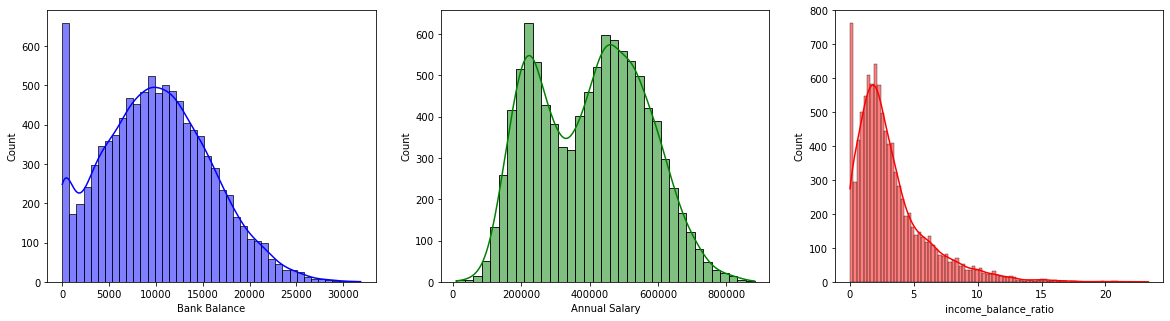

In [96]:
ldf_savings_percentile = ldf_data[ldf_data['income_balance_ratio'] < ldf_data['income_balance_ratio'].quantile(0.999)]
# Creating distributions over the two continous variables
f, ax1 = plt.subplots(1,3, figsize=(20,5))
sns.histplot(ax=ax1[0], x=ldf_data['Bank Balance'], color='blue', kde=True)
sns.histplot(ax=ax1[1],x=ldf_data['Annual Salary'], color='green', kde=True)
sns.histplot(ax=ax1[2],x=ldf_savings_percentile['income_balance_ratio'], color='red', kde=True)

From this visualisation we gather that whilst bank balance is somewhat normally distributed (excluding A LOT of 0's), Annual salary doesnt seem to be. The percentage of income sabed, seems to b somewhat normally distributed, however as with bank balance this is naturally excluding a lot of 0's. Again this will be something to look out for in further analysis.

### Creating a test set
Before we go any further its worth creating a test set. This is due to the fact that the human brain is amazing at quickly spotting patterns, which unfortunately makes it vary prone to overfitting models ;). So in order to avoid this (or atleast be able to somewhat control for it), i create a test set before going any further.

In [37]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ldf_data, test_size=0.2, random_state=1)

## Exploring distributions more closely

## Exploring the binary and categorical predictors

## Exploring correlations 

## Exp